In [1]:
import numpy as np
from numpy.linalg import inv
import scipy as sp
import librosa
import matplotlib.pyplot as plt  
import pywt
import sounddevice as sd
import soundfile as sf

# 1.5 Μελέτη χαρακτηριστικών του delay-and-sum beam pattern για ΟΓΣ

### Απόσταση μικροφώνων d = 4cm αριθμός μικροφώνων N = 4, 8, 16.

In [3]:
f = 2000
theta = np.arange(0,np.pi,0.01)
theta_s = np.pi/2
c = 340


def beam_pattern(theta,d,N,f):
    B1 = np.sin(N*np.pi*f*d*(np.cos(theta)-np.cos(theta_s))/c)

    B2 = N*np.sin(np.pi*f*d*(np.cos(theta)-np.cos(theta_s))/c)

    return B1/B2


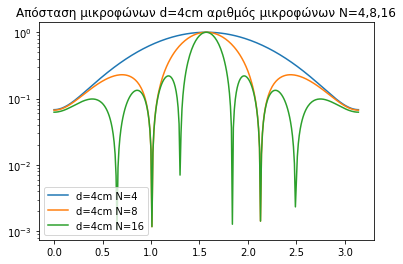

In [30]:
plt.semilogy(theta, np.abs(beam_pattern(theta,0.04,4,f)),label='d=4cm N=4')
plt.semilogy(theta, np.abs(beam_pattern(theta,0.04,8,f)),label='d=4cm N=8')
plt.semilogy(theta, np.abs(beam_pattern(theta,0.04,16,f)),label='d=4cm N=16')
plt.title('Απόσταση μικροφώνων d=4cm αριθμός μικροφώνων N=4,8,16')
plt.legend(loc='lower left')
#plt.savefig('erot_1_4_1.png')

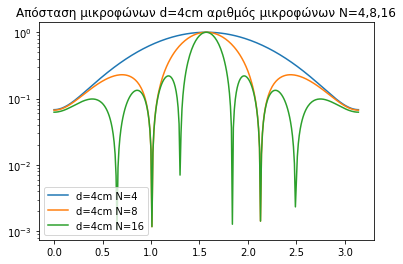

In [31]:
plt.semilogy(theta, np.abs(beam_pattern(theta,0.04,4,f)),label='d=4cm N=4')
plt.semilogy(theta, np.abs(beam_pattern(theta,0.04,8,f)),label='d=4cm N=8')
plt.semilogy(theta, np.abs(beam_pattern(theta,0.04,16,f)),label='d=4cm N=16')
plt.title('Απόσταση μικροφώνων d=4cm αριθμός μικροφώνων N=4,8,16')
plt.legend(loc='lower left')
#plt.savefig('erot_1_4_1.png')

### Απόσταση μικροφώνων d = 4, 8, 16cm αριθμός μικροφώνων N = 8.

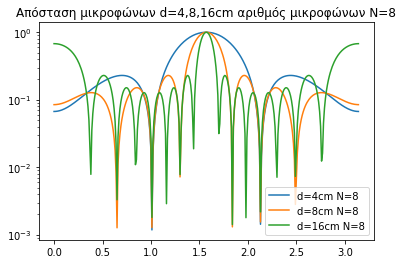

In [24]:
plt.semilogy(theta, np.abs(beam_pattern(theta,0.04,8,f)),label='d=4cm N=8')
plt.semilogy(theta, np.abs(beam_pattern(theta,0.08,8,f)),label='d=8cm N=8')
plt.semilogy(theta, np.abs(beam_pattern(theta,0.16,8,f)),label='d=16cm N=8')
plt.title('Απόσταση μικροφώνων d=4,8,16cm αριθμός μικροφώνων N=8')
plt.legend(loc='lower right')
#plt.savefig('erot_1_4_2.png')

### Έστω τώρα ότι η συστοιχία αποτελείται από N = 8 μικρόφωνα με απόσταση d = 8cm. Το επιθυμητό σήμα καταφθάνει από γωνία θs = pi/2.

In [18]:
def beam_pattern3(theta,f):
    B1 = np.sin(8*np.pi*f*0.08*(np.cos(theta)-np.cos(np.pi/2))/c)

    B2 = 8*np.sin(np.pi*f*0.08*(np.cos(theta)-np.cos(np.pi/2))/c)

    return B1/B2

<ipython-input-18-444306a73372>:6: RuntimeWarning: invalid value encountered in true_divide
  return B1/B2
<ipython-input-18-444306a73372>:6: RuntimeWarning: invalid value encountered in true_divide
  return B1/B2
<ipython-input-18-444306a73372>:6: RuntimeWarning: invalid value encountered in true_divide
  return B1/B2


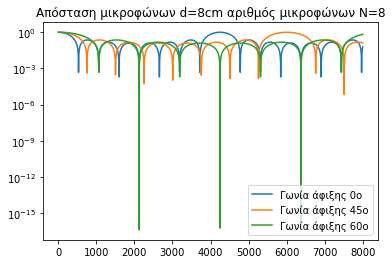

In [23]:
f1 = np.arange(0,8000)
plt.semilogy(f1, np.abs(beam_pattern3(0,f1)),label='Γωνία άφιξης 0ο')
plt.semilogy(f1, np.abs(beam_pattern3(np.pi/4,f1)),label='Γωνία άφιξης 45ο')
plt.semilogy(f1, np.abs(beam_pattern3(np.pi/3,f1)),label='Γωνία άφιξης 60ο')
plt.title('Απόσταση μικροφώνων d=8cm αριθμός μικροφώνων N=8')
plt.legend(loc='lower right')
#plt.savefig('erot_1_4_3.png')

# 2.1 Beamforming σε προσομοιωμένα σήματα

## Α) Delay-and-sum beamforming

In [84]:
N = 7
d = 0.04

ss, Fs = sf.read('Material\MicArraySimulatedSignals\source.wav')
s0, Fs = sf.read('Material\MicArraySimulatedSignals\sensor_0.wav')
s1, Fs = sf.read('Material\MicArraySimulatedSignals\sensor_1.wav')
s2, Fs = sf.read('Material\MicArraySimulatedSignals\sensor_2.wav')
s3, Fs = sf.read('Material\MicArraySimulatedSignals\sensor_3.wav')
s4, Fs = sf.read('Material\MicArraySimulatedSignals\sensor_4.wav')
s5, Fs = sf.read('Material\MicArraySimulatedSignals\sensor_5.wav')
s6, Fs = sf.read('Material\MicArraySimulatedSignals\sensor_6.wav')

T_n = []
for i in range(0,N):
    T_n.append(-(i-(N-1)/2)*d*np.cos(np.pi/4)/c)
    
length = np.size(s0)
w = np.linspace(0,2*np.pi,length)

Y0 = np.fft.fft(s0,length) * (np.exp(-1j*w*T_n[0]*Fs)).T
Y1 = np.fft.fft(s1,length) * (np.exp(-1j*w*T_n[1]*Fs)).T
Y2 = np.fft.fft(s2,length) * (np.exp(-1j*w*T_n[2]*Fs)).T
Y3 = np.fft.fft(s3,length) * (np.exp(-1j*w*T_n[3]*Fs)).T
Y4 = np.fft.fft(s4,length) * (np.exp(-1j*w*T_n[4]*Fs)).T
Y5 = np.fft.fft(s5,length) * (np.exp(-1j*w*T_n[5]*Fs)).T
Y6 = np.fft.fft(s6,length) * (np.exp(-1j*w*T_n[6]*Fs)).T

Y = (Y0+Y1+Y2+Y3+Y4+Y5+Y6)/N
y_t = np.real(np.fft.ifft(Y,length))

sf.write('sim_ds.wav', y_t, Fs)
sf.write('beamformer_review.wav', y_t-ss, Fs)

In [85]:
type(Y)

numpy.ndarray

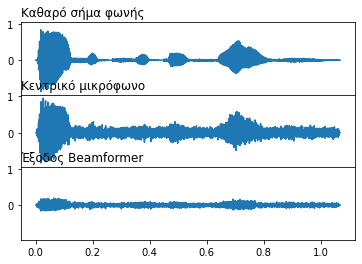

In [93]:
t = np.linspace(0,np.size(ss)/Fs,np.size(ss))
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
axs[0].plot(t,ss), axs[0].set_title('Καθαρό σήμα φωνής', loc = 'left')
axs[1].plot(t,s3), axs[1].set_title('Κεντρικό μικρόφωνο', loc = 'left')
axs[2].plot(t,np.real(y_t)), axs[2].set_title('Έξοδος Beamformer', loc = 'left')
for ax in axs:
    ax.label_outer()
#plt.savefig('erot_2_1_a1.png')

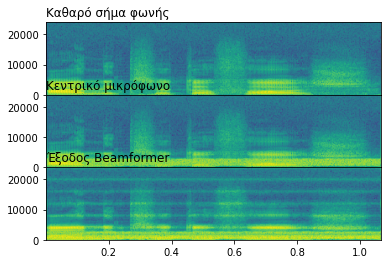

In [92]:
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
axs[0].specgram(ss,NFFT=256,Fs=Fs), axs[0].set_title('Καθαρό σήμα φωνής', loc = 'left')
axs[1].specgram(s3,NFFT=256,Fs=Fs), axs[1].set_title('Κεντρικό μικρόφωνο', loc = 'left')
axs[2].specgram(y_t,NFFT=256,Fs=Fs), axs[2].set_title('Έξοδος Beamformer', loc = 'left')
for ax in axs:
    ax.label_outer()
#plt.savefig('erot_2_1_a2.png')

In [99]:
def snr(signal,noisy_signal):
    
    n = signal.shape[0]
    m = noisy_signal.shape[0]
    ssum = np.empty(n)
    nsum = np.empty(m)
    
    #for i in np.arange(0,n):ssum[i] = np.abs(signal[i]) ** 2
    
    noise = noisy_signal-signal
    
    #for i in np.arange(0,m):nsum[i] = np.abs(noise[i]) ** 2
        
    p_s = np.sum(signal**2)/n
    
    p_n = np.sum(noise**2)/m
    
    snr_db = -10*np.log10((p_s)/p_n) +10
    
    return snr_db


print('Beamformer snr = ',snr(ss,y_t))
print('Central mic snr = ',snr(ss,s3))

Beamformer snr =  10.413823408524156
Central mic snr =  7.000000018519056


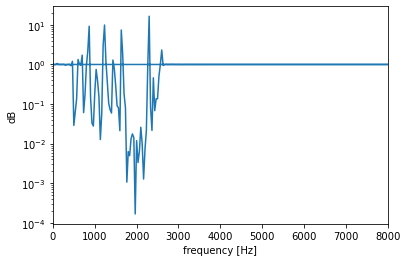

In [101]:
# 2.1 B
s = ss[int(0.75*Fs) : int(0.78*Fs)]
x = s3[int(0.75*Fs) : int(0.78*Fs)]

P_s, P_s_den = sp.signal.welch(s,fs=Fs,nperseg=np.size(s),detrend=False,return_onesided=False)
P_x, P_x_den = sp.signal.welch(x,fs=Fs,nperseg=np.size(x),detrend=False,return_onesided=False)

H_w = P_s_den/P_x_den

plt.semilogy(P_s, H_w)
plt.xlim([0,8000])
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')
#plt.savefig('erot_2_1_b1.png')

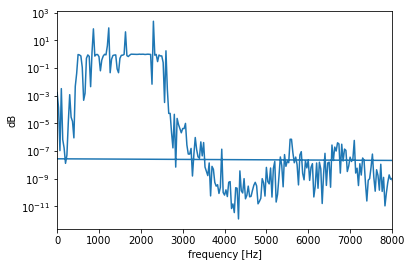

In [102]:
n_sd = np.abs(1-H_w)**2

plt.semilogy(P_s, n_sd)
plt.xlim([0,8000])
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')
#plt.savefig('erot_2_1_b2.png')

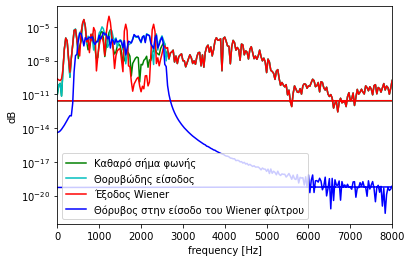

In [104]:
X = np.fft.fft(x)
Y = X * H_w

y_H = np.real(np.fft.ifft(Y,np.size(x)))
P_y_H, P_y_H_den = sp.signal.welch(y_H,fs=Fs,nperseg=np.size(y_H),detrend=False,return_onesided=False) 

P_v, P_v_den = sp.signal.welch(x-s,fs=Fs,nperseg=np.size(x-s),detrend=False,return_onesided=False)

plt.semilogy(P_s,P_s_den,color='g',label='Καθαρό σήμα φωνής')
plt.semilogy(P_x,P_x_den,color='c',label='Θορυβώδης είσοδος')
plt.semilogy(P_y_H,P_y_H_den,color='r',label='Έξοδος Wiener')
plt.semilogy(P_v,P_v_den,color='b',label='Θόρυβος στην είσοδο του Wiener φίλτρου')
plt.xlim([0,8000])
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')
plt.legend(loc='lower left')
#plt.savefig('erot_2_1_b3.png')

In [106]:
print('Beamformer snr = ',snr(ss,y_t))
print('Wiener snr = ',snr(s,y_H))

Beamformer snr =  10.413823408524156
Wiener snr =  12.156244518412013


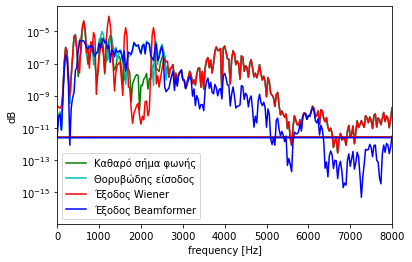

In [18]:
y_beamformer, Fs = sf.read('sim_ds.wav')
P_y_beamformer ,P_y_beamformer_den = sp.signal.welch(y_beamformer[int(0.75*Fs) : int(0.78*Fs)],fs=Fs,nperseg=np.size(x-s),detrend=False,return_onesided=False)

plt.semilogy(P_s,P_s_den,color='g',label='Καθαρό σήμα φωνής')
plt.semilogy(P_x,P_x_den,color='c',label='Θορυβώδης είσοδος')
plt.semilogy(P_y_H,P_y_H_den,color='r',label='Έξοδος Wiener')
plt.semilogy(P_y_beamformer,P_y_beamformer_den,color='b',label='Έξοδος Beamformer')
plt.xlim([0,8000])
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')
plt.legend(loc='lower left')
#plt.savefig('erot_2_1_b4.png')

# Beamforming σε πραγματικά σήματα

## Dealay-and-sum beamforming

In [107]:
N = 7
d = 0.08

rs, Fs = sf.read('Material\MicArrayRealSignals\source.wav')
r0, Fs = sf.read('Material\MicArrayRealSignals\sensor_0.wav')
r1, Fs = sf.read('Material\MicArrayRealSignals\sensor_1.wav')
r2, Fs = sf.read('Material\MicArrayRealSignals\sensor_2.wav')
r3, Fs = sf.read('Material\MicArrayRealSignals\sensor_3.wav')
r4, Fs = sf.read('Material\MicArrayRealSignals\sensor_4.wav')
r5, Fs = sf.read('Material\MicArrayRealSignals\sensor_5.wav')
r6, Fs = sf.read('Material\MicArrayRealSignals\sensor_6.wav')

T_n = []
for i in range(0,N):
    T_n.append(-(i-(N-1)/2)*d*np.cos(np.pi/4)/c)
    
length = np.size(r0)
w = np.linspace(0,2*np.pi,length)

Y0 = np.fft.fft(r0,length) * np.exp(-1j*w*T_n[0]*Fs).T
Y1 = np.fft.fft(r1,length) * np.exp(-1j*w*T_n[1]*Fs).T
Y2 = np.fft.fft(r2,length) * np.exp(-1j*w*T_n[2]*Fs).T
Y3 = np.fft.fft(r3,length) * np.exp(-1j*w*T_n[3]*Fs).T
Y4 = np.fft.fft(r4,length) * np.exp(-1j*w*T_n[4]*Fs).T
Y5 = np.fft.fft(r5,length) * np.exp(-1j*w*T_n[5]*Fs).T
Y6 = np.fft.fft(r6,length) * np.exp(-1j*w*T_n[6]*Fs).T

Y = Y0+Y1+Y2+Y3+Y4+Y5+Y6
r_y_t = np.real(np.fft.ifft(Y/N,length))

sf.write('real_ds.wav', r_y_t, Fs)
sf.write('real_beamformer_review.wav', r_y_t-rs, Fs)

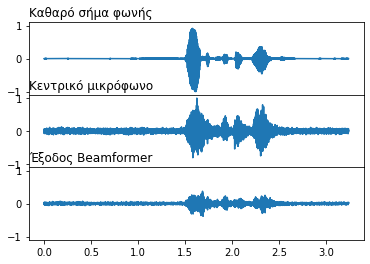

In [108]:
t = np.linspace(0,np.size(rs)/Fs,np.size(rs))

fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
axs[0].plot(t,rs), axs[0].set_title('Καθαρό σήμα φωνής', loc = 'left')
axs[1].plot(t,r3), axs[1].set_title('Κεντρικό μικρόφωνο', loc = 'left')
axs[2].plot(t,r_y_t), axs[2].set_title('Έξοδος Beamformer', loc = 'left')
for ax in axs:
    ax.label_outer()
#plt.savefig('erot_2_2_a1.png')

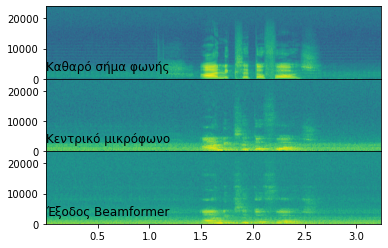

In [109]:
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

axs[0].specgram(rs,NFFT=256,Fs=Fs), axs[0].text(0, 3000, 'Καθαρό σήμα φωνής',fontsize=12)
axs[1].specgram(r3,NFFT=256,Fs=Fs), axs[1].text(0, 3000, 'Κεντρικό μικρόφωνο',fontsize=12)
axs[2].specgram(r_y_t,NFFT=256,Fs=Fs), axs[2].text(0, 3000, 'Έξοδος Beamformer',fontsize=12)

for ax in axs:
    ax.label_outer()
#plt.savefig('erot_2_2_a2.png')

In [111]:
def ssnr(signal, Fs):
    
    thres = -10
    L = int(0.03*Fs)
    M = int(np.floor(np.size(signal)/L))
    
    noise = signal[0:L+1]
    p_noise = np.sum(np.abs(noise)**2)
    
    ssnr_y = 0
    for i in np.arange(0,M+1):
        frame_s = signal[(i-1)*L +1  : i*L]
        p_frame_s = np.sum(np.abs(frame_s)**2)
        
        ssnr = 10*np.log10(np.abs(p_frame_s-p_noise) / p_noise)
        
        if ssnr >= thres:
            if ssnr >= 35:
                ssnr_y += 35
            else:
                ssnr_y +=  ssnr
        else:
            ssnr_y += thres
            
    return ssnr_y/M

In [120]:
print('Central mic ssnr = ',ssnr(r3,Fs)+10)
print('Beamformer ssnr = ',ssnr(r_y_t,Fs)+10)

Central mic ssnr =  7.776981595404747
Beamformer ssnr =  8.779198756390441
